# 4. Random Forest Analysis

## Setup

In [63]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import ensemble
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline

In [43]:
# Load data
data = pd.read_csv('data/Ames_Housing_Price_Data_encoded.csv')

In [44]:
# Create the independent variables and the target
predictors = data.drop('SalePrice', axis=1)
target = data['SalePrice']

## Preprocessing

In [45]:
# Check columns
print(predictors.columns)

Index(['GrLivArea', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_VWD',
       'SaleType_WD ', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=243)


In [46]:
# Check to see if there are any missing values
print(predictors.isnull().sum().sum())

0


In [47]:
# Check to see if there are any categorical variables
print(predictors.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2579 entries, 0 to 2578
Columns: 243 entries, GrLivArea to SaleCondition_Partial
dtypes: float64(11), int64(232)
memory usage: 4.8 MB
None


## Perform Train-Test Split

In [48]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(predictors, target, random_state=0, test_size = 0.2)

## Train the Model

In [49]:
# Initialize a random forest regressor
rf = ensemble.RandomForestRegressor(random_state=0)

In [51]:
# Define the parameter grid
param_dist = {
    'n_estimators': [10, 50, 100, 200, 500],
    'max_features': ['auto', 'log2', 'sqrt'],
    'max_depth': [10, 20, 30, 40, 50, None],
    'min_samples_split': [10, 20, 30],
    'min_samples_leaf': [5, 10, 15]
}

In [52]:
# Initialize the grid search model
grid_search = GridSearchCV(estimator = rf,
                           param_grid = param_dist, 
                           cv=5,
                           scoring='neg_mean_squared_error',
                           n_jobs = -1,
                           verbose = 1)

In [53]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 810 candidates, totalling 4050 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, 40, 50, None],
                         'max_features': ['auto', 'log2', 'sqrt'],
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [10, 20, 30],
                         'n_estimators': [10, 50, 100, 200, 500]},
             scoring='neg_mean_squared_error', verbose=1)

In [54]:
# Get the best parameters
best_params = grid_search.best_params_
print(best_params)

{'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 200}


In [55]:
# Use the best parameters
rf_best = grid_search.best_estimator_
rf_best.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, min_samples_leaf=5, min_samples_split=10,
                      n_estimators=200, random_state=0)

In [56]:
# Predict the train set
y_pred_train = rf_best.predict(X_train)

In [57]:
# Predict the test set
y_pred_test = rf_best.predict(X_test)

## Model Evaluation

In [64]:
# Calculate and print the metrics for Train
mse_train = mean_squared_error(y_train, y_pred_train)
print("Train Mean Squared Error: ", mse_train)

r2_train = r2_score(y_train, y_pred_train)
print("Train R2 Score: ", r2_train)

Train Mean Squared Error:  281983585.594761
Train R2 Score:  0.9488117680381956


In [65]:
# Calculate and print the metrics for Test
mse_test = mean_squared_error(y_test, y_pred_test)
print("Test Mean Squared Error: ", mse_test)

r2_test = r2_score(y_test, y_pred_test)
print("Test R2 Score: ", r2_test)

Test Mean Squared Error:  586151322.5501002
Test R2 Score:  0.9041069940301463


## Feature Importances

In [26]:
# Top 10 features
importances = rf_best.feature_importances_
feature_importances = pd.DataFrame({'Feature': predictors.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print(feature_importances.head(10))

             Feature  Importance
0          GrLivArea    0.194672
24        GarageCars    0.176141
5          YearBuilt    0.100396
71   YearsSinceBuilt    0.092622
12          1stFlrSF    0.073087
25        GarageArea    0.062569
11       TotalBsmtSF    0.060813
132     ExterQual_TA    0.037755
8         BsmtFinSF1    0.036920
3            LotArea    0.012409


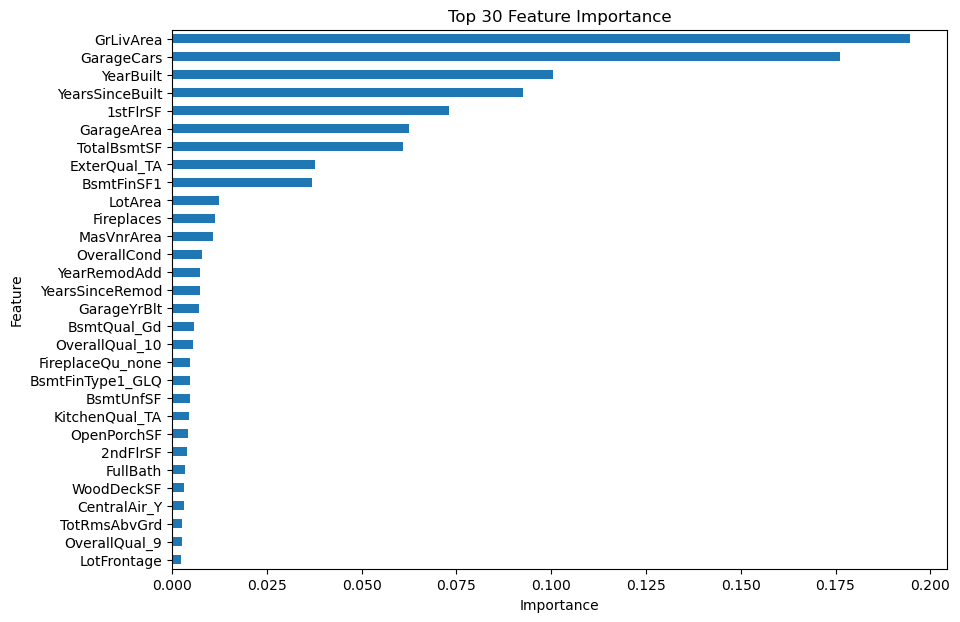

In [29]:
# Get the top 30 features
feature_importances_top_30 = feature_importances.head(30)

# Plot the bar chart
feature_importances_top_30.set_index('Feature')['Importance'].sort_values().plot(kind='barh', figsize=(10, 7))
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 30 Feature Importance')
plt.show()


In [30]:
# Count and show the number of features with importance of 0
print("Number of features with importance of 0: ", len(feature_importances[feature_importances['Importance'] == 0]))

Number of features with importance of 0:  102
